In [33]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pandas as pd

In [34]:
# importer data fra csv-fil (excel)
data = pd.read_csv('HousingPrices_selected.csv', sep=',')

# print første 5 rækker data
print(data.head(5))

   Postnummer  Husnummer  kvadratmeter  Grundareal  Byggeår  afstand_skole  \
0      4953.0        9.0            97       949.0   1942.0        5425.42   
1      2300.0       12.0            86         0.0   2006.0        1045.23   
2      2300.0       12.0            86         0.0   2006.0        1045.23   
3      2300.0       16.0            95         0.0   2007.0        1017.53   
4      2300.0       18.0            73         0.0   2007.0        1004.49   

   afstand_supermarked  Salgspris  
0              5551.78    1050000  
1               132.97    1352500  
2               132.97    3500000  
3               153.93    3463432  
4               166.23    2700000  


In [35]:
# Vi vil gerne forudse salgspris. Derfor laver vi et datasæt, input_data, uden priserne, så algoritmen ikke kan "snyde"
# Vi laver også et datasæt med sandheden, truth_data, altså de rigtige salgspriser
variabler       = data.columns
input_variabler = variabler[(variabler != 'Salgspris')]
input_data      = data[input_variabler]
truth_data      = data['Salgspris']

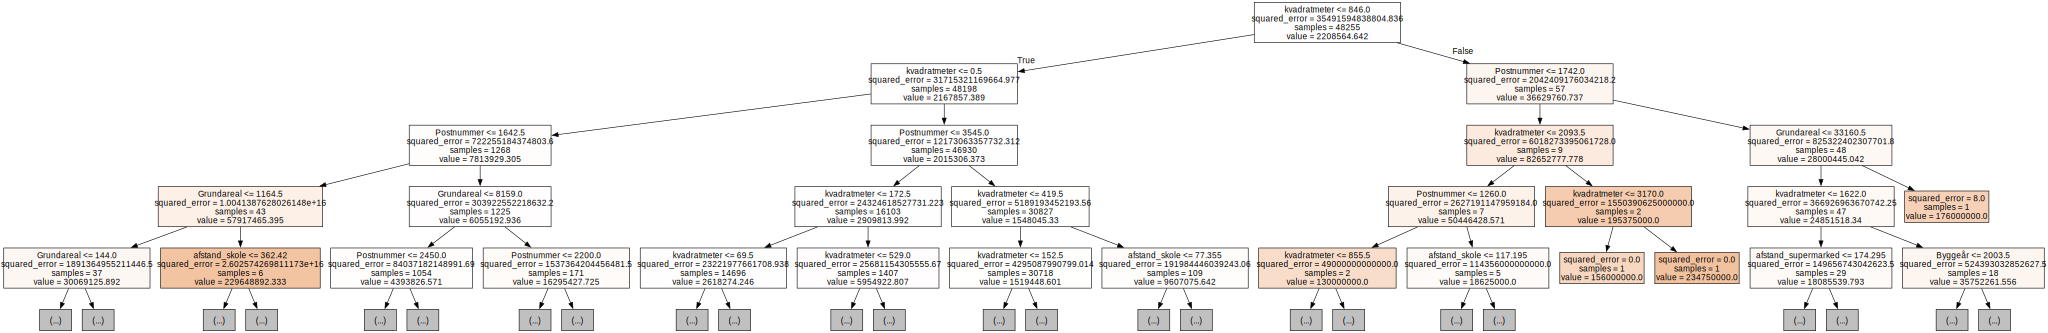

Tree depth: 44


In [36]:
# dataen vi har på husene undtagen salgsprisen
X = input_data

# salgspriserne som den skal gætte
y = truth_data

# Navn på parametre
labels = input_data.columns

estimator = DecisionTreeRegressor(max_depth=50, random_state=42)
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels
   , filled = True
   , max_depth=4))
display(SVG(graph.pipe(format='svg')))

print("Tree depth:", estimator.get_depth())